### **Supervised Machine Learning**


- Supervised Machine Learning is a type of machine learning that learns the relationship between input and output.

- In Supervised Machine Learning, the relationship between the input and labeled output is learnt through the process of training
- Two types of Supervised Machine Learning :
  -  Classification
  -  Regression

- **Classification** is a type of supervised machine learning where the model learns from the data to predict a discrete event or an outcome
    - Logistic Regression, Random Forest Classifier are some of the many machine learning algorithms for a classification problem

- **Regression** is a type of supervised machine learning where the model learns from the data to predict continuous values such as weight.
    - Linear Regression, Gradient Boosted Trees Regression are some of the many machine learning algorithms for a regression problem


*Reference:*


*Géron, Aurélien. "Hands-on machine learning with Scikit-Learn." Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems 1 (2019).*


### **Problem statement**

- The objective of this problem is about classifying  mushrooms with caps to be edible or poisonous.
- The dataset for this classification problem can be found at :

  https://archive.ics.uci.edu/dataset/73/mushroom

  

In [1]:
# Importing warnings module and filterwarnings() method

import warnings

warnings.filterwarnings("ignore")

### **Installing required Python libraries**

In [2]:
# Installing the SHAP library for calculating shapley metric for feature importance
!pip install shap --quiet

# Installing the Plotly library for interactive data visualization
!pip install plotly --quiet

# Installing the Seaborn library for statistical data visualization
!pip install seaborn --quiet

# Installing the catboost library for gradient boosting on decision trees
!pip install catboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


### **Importing the required libaries**

In [3]:
# Importing Pandas and Numpy for data manipulation
import pandas as pd
import numpy as np

# Importing Seaborn and Matplotlib for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Plotly for interactive data visualization
import plotly.express as px

# Importing train_test_split package from scikit-learn's model selection module
from sklearn.model_selection import train_test_split

# Importing CatBoostClassifier for gradient boosting on decision trees
from catboost import CatBoostClassifier

# Importing confusion_matrix, ConfusionMatrixDisplay from scikit-learn's metrics module
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Importing SHAP library Metric for feature importance calculation using Shapley values
import shap

In [4]:
# Mounting Google Drive to access files in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing mushrooms.csv to a Pandas DataFrame

df = pd.read_csv("/content/drive/MyDrive/mushrooms.csv")

### **Analytics and Preliminary Visualization**


<Axes: xlabel='class', ylabel='count'>

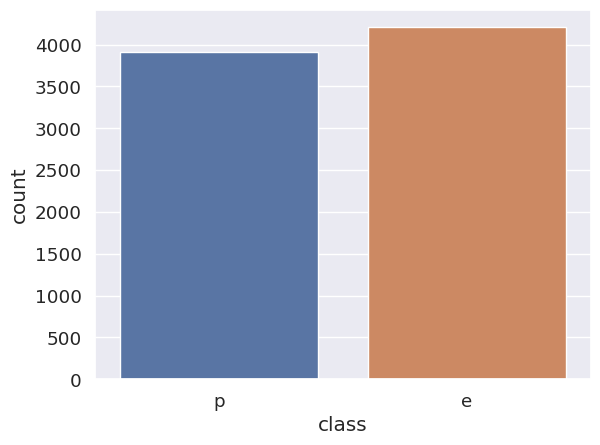

In [6]:
# EDA - Data analysis

# Visualizing the distribution of categories in the 'class' feature with Seaborn's countplot
sns.set(font_scale = 1.2)
sns.countplot(data = df, x = "class")

In [ ]:
# The plot shows that there is no significant class imbalance potentially negating the
# need for sampling

In [7]:
# Display the number of rows and columns in the dataframe with the df.shape attribute

df.shape

(8124, 23)

In [8]:
# Displaying the names of the columns in the dataframe with df.columns attribute

df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### **Data Cleaning and Missing values**

In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# While the df.isnull().sum() shows there are no missing values or null values,
# the dataframe column 'stalk-root' does have '?' (missing) category

# The percentage of missing values in this column : 30.5% as shown subsequently


In [55]:
# using df.replace() method to provide descriptive labels for the 'stalk-root'column
# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

df['stalk-root'] = df['stalk-root'].replace({'b':'bulbous','c':'club','u':'cup',
                                             'e':'equal','z':'rhizomorphs','r':'rooted','?':'missing'})
df['stalk-root'].unique()


array(['equal', 'club', 'bulbous', 'rooted', 'missing'], dtype=object)

In [11]:
# df.value_counts() method to get the proportion of each category in 'stalk-root' column

df['stalk-root'].value_counts(normalize = True)

bulbous    0.464796
missing    0.305268
equal      0.137863
club       0.068439
rooted     0.023634
Name: stalk-root, dtype: float64

### **Descriptive label for each column**





In [12]:
# Using df.replace() method to provide descriptive labels for the 'class' column values
# In the 'class' column, replacing 'edible' with 'e' and 'poisonous' with 'p'

df['class'] = df['class'].replace({'p':'poisonous', 'e':'edible'})

In [13]:
# Displaying the unique values in the 'class' column with df.unique() method
df['class'].unique()

array(['poisonous', 'edible'], dtype=object)

In [14]:
# Using df.replace() method to provide desciptive labels for the 'cap-shape' column values
# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

df['cap-shape'] = df['cap-shape'].replace({'x':'convex','b':'bell','s':'sunken','f':'flat','c':'conical','k':'knobbed'})

In [15]:
df['cap-shape'].unique()


array(['convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical'],
      dtype=object)

In [16]:
# Using df.replace() method to provide descriptive labels for the 'ring-number' column values
# ring-number: none=n,one=o,two=t

df['ring-number'] = df['ring-number'].replace({'o':'one','t':'two','n':'none'})

df['ring-number'].unique()

array(['one', 'two', 'none'], dtype=object)

In [17]:
# Providing descriptive labels for the 'stalk-shape' column values with df.replace() method
# stalk-shape : enlarging=e,tapering=t

df['stalk-shape'] = df['stalk-shape'].replace({'e':'enlarging','t':'tapering'})
df['stalk-shape'].unique()


array(['enlarging', 'tapering'], dtype=object)

In [18]:
# Display the count of each unique category in 'stalk-shape' column

df['stalk-shape'].value_counts()

tapering     4608
enlarging    3516
Name: stalk-shape, dtype: int64

In [19]:
# Providing descriptive labels for the 'population' column values with df.replace() method
# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y


df['population'] = df['population'].replace({'s':'scattered','n':'numerous','a':'abundant','v':'several','y':'solitary','c':'clustered'})
df['population'].unique()

array(['scattered', 'numerous', 'abundant', 'several', 'solitary',
       'clustered'], dtype=object)

In [20]:
# Providing descriptive labels for the 'habitat' column values with df.replace() method

# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

df['habitat'] = df['habitat'].replace({'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'})

In [21]:
# Providing descriptive labels for the 'bruises' column values with df.replace() method
# bruises: bruises=t,no=f

df['bruises'] = df['bruises'].replace({'t':'yes','f':'no'})
df['bruises'].unique()

array(['yes', 'no'], dtype=object)

In [22]:
# Providing descriptive labels for the 'odor' column values with df.replace() method
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

df['odor'] = df['odor'].replace({'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'})

In [23]:
# Providing descriptive labels for the 'ring-type' column values with df.replace() method
# 'ring-type' : cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

df['ring-type'] = df['ring-type'].replace({'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'})

In [24]:
# Providing desciptive labels for the 'cap-surface' column values with df.replace() method
# cap-surface : fibrous=f,grooves=g,scaly=y,smooth=s

df['cap-surface'] = df['cap-surface'].replace({'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'})

In [25]:
# Providing descriptive labels for the 'cap-color' column values with df.replace() method
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

df['cap-color'] = df['cap-color'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})

In [26]:
# Providing descriptive labels for the 'gill-attachment' column values with df.replace() method
#gill-attachment: attached=a,descending=d,free=f,notched=n

df['gill-attachment'] = df['gill-attachment'].replace({'a':'attached','d':'descending','f':'free','n':'notched'})

In [27]:
# Providing descriptive labels for the 'gill-spacing' column values with df.replace() method
# gill-spacing: close=c,crowded=w,distant=d

df['gill-spacing'] = df['gill-spacing'].replace({'c':'close','w':'crowded','d':'distant'})

In [28]:
# Providing descriptive labels for the 'gill-size' column values with df.replace() method
# gill-size: broad=b,narrow=n

df['gill-size'] = df['gill-size'].replace({'b':'broad','n':'narrow'})


In [29]:
# Providing descriptive labels for the 'gill-color' column values with df.replace() method
# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

df['gill-color'] = df['gill-color'].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})

In [30]:
# Providing descriptive labels for the 'spore-print-color' column values with df.replace() method
# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

df['spore-print-color'] = df['spore-print-color'].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'})

In [31]:
# Providing descriptive labels for the 'veil-color' column values with df.replace() method
# veil-color: brown=n,orange=o,white=w,yellow=y

df['veil-color'] = df['veil-color'].replace({'n':'brown','o':'orange','w':'white','y':'yellow'})

In [32]:
# Providing descriptive labels for the 'stalk-color-below-ring' column values with df.replace() method
# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'})

In [33]:
# Providing descriptive labels for the 'stalk-color-above-ring' column values with df.replace() method
# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

df['stalk-color-above-ring']  = df['stalk-color-above-ring'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'})

In [34]:
# Providing descriptive labels for the 'stalk-surface-below-ring' column values with df.replace() method
# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'})

In [35]:
# Providing descriptive labels for the 'stalk-surface-above-ring' column values with df.replace() method
# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'})

In [36]:
# Providing descriptive labels for the 'veil-type' column values with df.replace() method
#veil-type: partial=p,universal=u

df['veil-type']= df['veil-type'].replace({'p':'partial','u':'universal'})

In [37]:
# Display the first five rows of the dataframe with df.head()

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


<Axes: xlabel='population', ylabel='Count'>

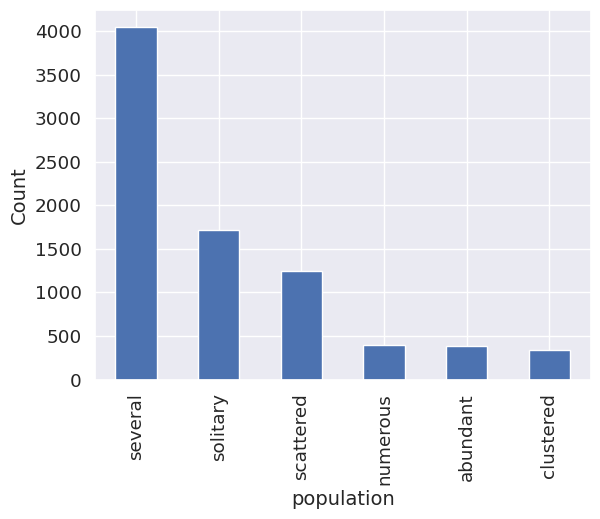

In [38]:
# Visualize the count of each unique categeory in the 'population' column in the form of a bar plot

plt.xlabel('population', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
df['population'].value_counts().plot(kind = "bar")

### **Interactive Visualization with Plotly**

In [39]:
# Visualize the distribution of the 'habitat' column using a Histogram with the Plotly library

fig = px.histogram(df, x = "habitat", title = "Histogram plot of habitat")
fig.update_layout(
    font = dict(family = "Times New Roman",size = 18, color = "red"),
    title_font_family = "Times New Roman",
    title_font_color = "red",
)
fig.show()

In [40]:
# Visualize the distribution of the 'population' column categorized by the 'odor' column using a Histogram with the Plotly library


fig = px.histogram(df, x = "population", color = "odor", title = "Distribution of population categorized by odor")
fig.update_layout(
    font = dict(family = "Times New Roman", size = 18, color = "red"),
    title_font_family = "Times New Roman",
    title_font_color = "red")
fig.show()

In [41]:
# Visualize the distribution of the 'bruises' column categorized by the 'ring-type' and 'cap-surface' column using a Histogram with the Plotly library

fig = px.histogram(df, x = "bruises", color = "ring-type", pattern_shape = "cap-surface",
                  title = "Distribution of bruises categorized by ring-type and cap-surface")
fig.update_layout(
    font = dict(family = "Times New Roman", size = 18, color = "RebeccaPurple"),
    title_font_family = "Times New Roman",
    title_font_color = "red"
)
fig.show()

In [42]:
# Display the names of the columns in the DataFrame

df.columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### **Modeling with Catboost**

In [43]:
# Splitting the data into train and validation datasets with an 80-20 proportion.

X = df.drop('class', axis = 1)
y = df['class']


X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [44]:
# Number of rows and columns in the X_train dataset with the .shape attribute

X_train.shape

(6499, 22)

In [45]:
# List of indices of the categorical features in the X_train dataset
# This list is used to specify the categorical features in the model.fit() method

cat_features_indices = list(range(0,X_train.shape[1],1))
cat_features_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [46]:
# Set the parameters for the CatBoostClassifier Model - namely : iterations,
# learning rate, tree depth and l2_regularization

params = {'iterations' : 500,
          'learning_rate' : 0.1,
          'depth' : 6,
          'l2_leaf_reg' : 3}
model = CatBoostClassifier(**params)


In [47]:
#  Training the model with model.fit() method with the CatBoostClassifier
# This method includes the training dataset (X_train, y_train)
# Indices of categorical features and sets verbose = False

model.fit(X_train, y_train, cat_features = cat_features_indices, verbose = False)

In [48]:
# Making the predictions on the Validation dataset using the CatBoostClassifier Model

y_pred = model.predict(X_validation)

In [49]:
# Calculation of the Accuracy metric for the validation dataset
accuracy = (y_pred == np.array(y_validation)).mean()
accuracy

1.0

In [50]:
# Making predictions on the training dataset using  the CatBoostClassifier Model

y_pred_train = model.predict(X_train)

In [51]:
# Calculation of  accuracy metric for the training dataset
accuracy_train = (y_pred_train == np.array(y_train)).mean()
accuracy_train

1.0

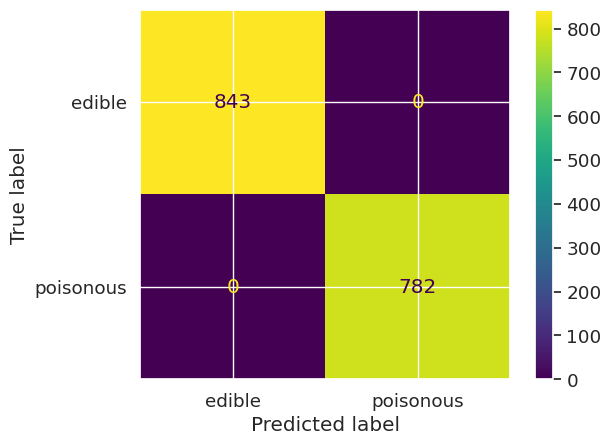

In [52]:
# Plotting the Confusion Matrix to compare the true values (y_validation)
# and predicted values (y_pred)

cm = confusion_matrix(y_validation, y_pred, labels = model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot()
plt.show()

In [53]:
# Calculation of the SHAP values using the Shap.Explainer() method
explainer = shap.Explainer(model)
shap_values = explainer(X_validation)

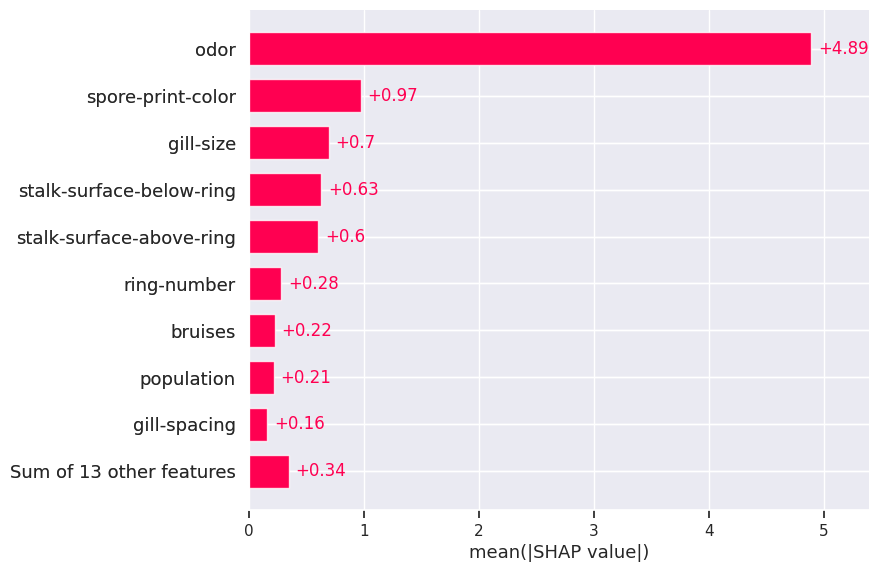

In [54]:
# Bar plot of the calculated SHAP values
shap.plots.bar(shap_values)